###Libraries and Corpus

In [ ]:
!pip install -U nltk

     |████████████████████████████████| 1.5 MB 7.4 MB/s 
     |████████████████████████████████| 748 kB 55.3 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
# imports
import os
import nltk
import nltk.corpus
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from pprint import pprint
from collections import Counter
from nltk.util import ngrams
import math
import numpy as np
from itertools import product
from nltk.lm.preprocessing import pad_both_ends
from nltk.util import bigrams
from nltk.lm.preprocessing import flatten
from nltk import lm
from nltk.lm import Vocabulary
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm.models import Laplace

In [ ]:
pip install python-Levenshtein

     |████████████████████████████████| 50 kB 4.1 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149857 sha256=7ea5ec948dff84663af4c99889918fc31afcd53201645454c26be80065ec25b9
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [ ]:
from Levenshtein import distance as lev

In [ ]:
nltk.download("abc")  # download the corpus "Australian Broadcasting Commission 2006"

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Unzipping corpora/abc.zip.


True

In [ ]:
nltk.data.path  # search for the path where it has been downloaded

['/root/nltk_data',
 '/usr/nltk_data',
 '/usr/share/nltk_data',
 '/usr/lib/nltk_data',
 '/usr/share/nltk_data',
 '/usr/local/share/nltk_data',
 '/usr/lib/nltk_data',
 '/usr/local/lib/nltk_data']

In [ ]:
os.chdir(r"/root/nltk_data/corpora/abc")  # change the directory appropriately

In [ ]:
with open("rural.txt") as file:
  ntext = file.read()

In [ ]:
ntext # The corpus

'PM denies knowledge of AWB kickbacks\nThe Prime Minister has denied he knew AWB was paying kickbacks to Iraq despite writing to the wheat exporter asking to be kept fully informed on Iraq wheat sales.\nLetters from John Howard and Deputy Prime Minister Mark Vaile to AWB have been released by the Cole inquiry into the oil for food program.\nIn one of the letters Mr Howard asks AWB managing director Andrew Lindberg to remain in close contact with the Government on Iraq wheat sales.\nThe Opposition\'s Gavan O\'Connor says the letter was sent in 2002, the same time AWB was paying kickbacks to Iraq though a Jordanian trucking company.\nHe says the Government can longer wipe its hands of the illicit payments, which totalled $290 million.\n"The responsibility for this must lay may squarely at the feet of Coalition ministers in trade, agriculture and the Prime Minister," he said.\nBut the Prime Minister says letters show he was inquiring about the future of wheat sales in Iraq and do not prov

###Question (i)

**Step 1:** Tokenization 

In [ ]:
nltk.download('punkt')
sentences = sent_tokenize(ntext)
tweet_wt = TweetTokenizer()
sentences_tokenized = []
for sent in sentences:
    sent_tok = tweet_wt.tokenize(sent)
    sentences_tokenized.append(sent_tok)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
print(sentences_tokenized[:4]) # Indicatively print the first four tokenized sentences of the corpus.

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.'], ['The', "Opposition's", 'Gavan', "O'Connor", 'says', 'the', 'letter', 'was', 'sent', 'in', '2002', ',', 'the', 'same', 'time', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'though', 'a', 'Jordanian', 'trucking', 'company', '.']]


**Step 2:** Train Dev Test splitting

In [ ]:
train_set,test_set = train_test_split(sentences_tokenized,test_size=0.20, random_state=10)
test_set,dev_set = train_test_split(test_set,test_size=20,random_state=10)

In [ ]:
print(len(train_set),len(test_set),len(dev_set)) # length of lists

10399 2580 20


**Step 3:** Creation of our Vocabulary based on word frequencies

In [ ]:
N = 10
tokens = []
for sublist in train_set:
    for item in sublist:
        tokens.append(item)

count = nltk.FreqDist(tokens)  # Frequency distribution
print('{} most common tokens: \n')
vocab_used=[]
for i in count.keys():
  if count[i]>=10:
    vocab_used.append(i)
pprint(count.most_common(N))  # just to check what we create

{} most common tokens: 

[('the', 12323),
 ('.', 10349),
 (',', 8718),
 ('to', 7684),
 ('of', 5914),
 ('and', 4793),
 ('"', 4616),
 ('in', 4512),
 ('a', 4298),
 ('is', 3203)]


In [ ]:
len(set(tokens))  # all the words of the text // total ~16738 before the addiation of UNK

16738

In [ ]:
len(vocab_used)   # vocabulary with train set words of frequency >9  // total ~2802 before the addition of UNK

2802

**Step 4:** Add UNK for the unknown words in our splits

In [ ]:
def UNK(sett,vocab_used):
  """Checking for each word of the corpus,
  if it exists inside the vocabulary.
  If not, replace it with *UNK*."""
  for i in range(len(sett)):
    for j in range(len(sett[i])):
      if sett[i][j] not in vocab_used:
        sett[i][j]="*UNK*"
  return sett

# apply it on train,test,dev
train_set = UNK(train_set,vocab_used)
test_set = UNK(test_set,vocab_used)
dev_set = UNK(dev_set,vocab_used)

**Step 5:**  Creation of Bigrams and Trigrams

In [ ]:
unigram_counter = Counter()
bigram_counter = Counter()
trigram_counter = Counter()

for sent in train_set: 
    unigram_counter.update([gram for gram in ngrams(sent, 1, pad_left=True, pad_right=True,
                                                   left_pad_symbol='<s>',right_pad_symbol='<e>') ])
    bigram_counter.update([gram for gram in ngrams(sent, 2, pad_left=True, pad_right=True,
                                                   left_pad_symbol='<s>',right_pad_symbol='<e>') ])
    trigram_counter.update([gram for gram in ngrams(sent, 3, pad_left=True, pad_right=True,
                                                   left_pad_symbol='<s>',right_pad_symbol='<e>') ])

**Step 6:** Laplace smoothing

In [ ]:
# We could also fine-tune alpha instead of using Laplace smoothing
alpha = 1          # <--Laplace smoothing

# Calculate vocab size 
vocab_size = len(set(vocab_used))

# Bigram prob + Laplace smoothing
bigram_prob = {}
bigram_log_prob = {}
for i in bigram_counter:
  bigram_prob[i]=(bigram_counter[i] + alpha) / (unigram_counter[(i[0],)] + alpha*vocab_size)
  bigram_log_prob[i] = math.log2(bigram_prob[i])

# Trigram prob + Laplace smoothing
trigram_prob = {}
trigram_log_prob = {}
for i in trigram_counter:
  trigram_prob[i]=(trigram_counter[i] + alpha) / (bigram_counter[(i[0],i[1])] + alpha*vocab_size)
  trigram_log_prob[i] = math.log2(trigram_prob[i])

**Step 7:** Sums of the Bi- and Trigram log probabilities

In [ ]:
# bigram
sum_log_bi=-sum(bigram_log_prob.values())
print("Sum of bigram log probabilities: ",sum_log_bi)

# trigram
sum_log_tri=-sum(trigram_log_prob.values())
print("Sum of trigram log probabilities: ",sum_log_tri)

Sum of bigram log probabilities:  725019.3840043518
Sum of trigram log probabilities:  1709049.5548748556


###Question (ii)

Entropy and Perplexity for the Bigram model

In [ ]:
sum_prob = 0
bigram_cnt = 0

for sent in test_set: # sent=sentence 
    sent = ['<s>'] + sent + ['<e>']

    # Iterate over the bigrams of the sentence
    for idx in range(2, len(sent)):    # We start from 2, to not include "<s>"  |||   # alpha=1 
        bigram_proba = (bigram_counter[(sent[idx-1], sent[idx])] + alpha) / (unigram_counter[(sent[idx-1],)] + alpha*vocab_size) # compute the bigram
        sum_prob += math.log2(bigram_proba) 
        bigram_cnt += 1

HC = -sum_prob / bigram_cnt
perpl = math.pow(2,HC)
print("Cross Entropy: {0:.3f}".format(HC))
print("Perplexity: {0:.3f}".format(perpl))

Cross Entropy: 7.915
Perplexity: 241.422


Entropy and Perplexity for the Trigram model

In [ ]:
sum_prob = 0
trigram_cnt = 0

for sent in test_set:
    sent = ['<s>'] + ['<s>'] + sent + ['<e>'] + ['<e>']

    for idx in range(4,len(sent) - 1): # We start from 4, to not include ("<s>","<s>",word) or ("<s>",word1,word2)  ||| (Notice [idx-2])
        trigram_proba = (trigram_counter[(sent[idx-2],sent[idx-1], sent[idx])] + alpha) / (bigram_counter[(sent[idx-2],sent[idx-1])] + alpha*vocab_size)
        sum_prob += math.log2(trigram_proba)
        trigram_cnt+=1

HC = -sum_prob / trigram_cnt
perpl = math.pow(2,HC)
print("Cross Entropy: {0:.3f}".format(HC))
print("Perplexity: {0:.3f}".format(perpl))

Cross Entropy: 9.876
Perplexity: 939.530


Entropy and Perplexity for the Bigram model using NLTK

In [ ]:
train, vocab = padded_everygram_pipeline(2, train_set)
lm = Laplace(2)
lm.fit(train, vocab)
print("Entropy for bigram using nltk:", lm.entropy(test_set))
print("Perplexity for bigram using nltk:", lm.perplexity(test_set))

Entropy for bigram using nltk: 11.45429929361948
Perplexity for bigram using nltk: 2805.999999999184


Entropy and Perplexity for the Trigram model using NLTK

In [ ]:
train, vocab = padded_everygram_pipeline(3, train_set)
lm = Laplace(3)
lm.fit(train, vocab)
print("Entropy for trigram using nltk:", lm.entropy(test_set))
print("Perplexity for trigram using nltk:", lm.perplexity(test_set))

Entropy for trigram using nltk: 11.437276336834826
Perplexity for trigram using nltk: 2773.0854112301304


###Question (iii)

**Context-aware spelling corrector with the Bigram model and Beam Search Decoder**

Hereunder can be found the example input-sentences that are presented in the report of the project:

In [ ]:
input_used = 'They clim the NLIS is nt just the fct " Mr McGaran sid.'
#input_used = 'South Rural Water have cut wait allocations to the irrigation different.'
#input_used = "The govermnt has announce a 5 per cen drop in the opening price compared to least season."
#input_used = 'It come to what you think about Dr McGauran " she said.'
#input_used = "The governmnt announce smthing abort the clmate change."
#input_used = "The governmnt announce sοmthing abort the clmate change."
#input_used = "They chef executie announce the new stndardarda."
#input_used = "John Williams frm the Universit of Melbourne says the results with be compared with singular data from the Union States."

**Step 1:** Preprocessing of the selected sentence about to be analyzed

In [ ]:
#tokenization of the sentence
#add '<s>' at the begining and '<e>' at the end of the sentence
sentence_to_be_analyzed = tweet_wt.tokenize(input_used)
sentence_to_be_analyzed = ['<s>'] + sentence_to_be_analyzed + ['<e>']
sentence_to_be_analyzed = np.array(sentence_to_be_analyzed)

**Step 2:** Creating a list of dictionaries (candidate word:Levenshtein probability). Each dictionary contains the candidate words of a specific token of the sentence we analyze

In [ ]:
# Transforming vocab_used into array
vocab_used = np.array(vocab_used)

# A list with the probabilities derived from the inverse of Levenshtein.
# For each word in each sentence, we compute its distance from every word of the vocabulary.
sentence_list = np.empty([1,0])                       # actually an array, not a list
sentence_list = np.append(sentence_list,{"<s>":1})    # we will append here a dictionary with the Levenshtein distances of each token of the sentence_to_be_analyzed
for word in sentence_to_be_analyzed[1:-1]:            # for each token of the sentence_to_be_analyzed (we exclude <s> and <e>)
    word_dict = {} 
    for vocab_word in vocab_used:                     # we check if the observed word is in the vocabulary (vocab_used)
        word_dict[vocab_word] = 1 /(lev(word,vocab_word) + 1)    # For the type 1 error     # +1 to avoid division by zero in case word=vocab_word
    sentence_list = np.append(sentence_list,word_dict)
sentence_list = np.append(sentence_list,{"<e>":1})

**Step 3:** Implementation of the Beam Search Decoder Algorithm and Selection of the best route

In [ ]:
l1=np.array([1])                        # possible values for the λ1, λ2 fine-tuning
l2=np.array([0.1,0.2,0.3,0.4,0.5,1,2,2.5,3.33,5,10])
comb = list(product(l1,l2))             # combinations of λ1, λ2

for l_1,l_2 in comb:
  value_mem = 0                         # initializing a value that will later be added to the total log-sum
  N_word_path = np.empty([1,0])
  N_word_path = np.append(N_word_path,{(" ","<s>") : 1})       # needed because previous_word chooses the previous second bigram word in every iteration

  for i in range(1,len(sentence_list)-1):                      # exclude dictionary containing <e>
    L_final = {}
    for vocab_word in vocab_used:
      log_prob_lev = math.log2(sentence_list[i][vocab_word])   # log of the Lev probs of the candidate words (all words of the vocabulary are actually candidates)
      for previous_word in N_word_path[i-1].keys():            # in order to take the "<s>", we begin with [i-1] with i:1-len(dictionary)
        previous_word = previous_word[1]                       # I take the second word from the previous bigram-tuple

        # calculating bigram log probs
        if (previous_word,vocab_word) in bigram_prob.keys():
          log_prob_bigr = previous_word, vocab_word, bigram_log_prob[(previous_word,vocab_word)]                           # check if the bigram of the previous word exists
        else:
          log_prob_bigr = previous_word, vocab_word, math.log2(1/(unigram_counter[(previous_word,)] + vocab_size))         # Laplace smoothing
        if i!=1:                                                                                                           # in the 1st iteration, there's only [{(' ', '<s>'): 1}], not 3 elements
          for k in range(3):                                   # we chose to keep the 3 best candidate words per iteration
            if list(N_word_path[i-1].keys())[k][1] == previous_word:
              value_mem = list(N_word_path[i-1].values())[k]
        L_final[(previous_word,vocab_word)] = -l_1*log_prob_bigr[2] - l_2*log_prob_lev + value_mem

    best_3_words = dict(sorted(L_final.items(), key=lambda item: item[1],reverse=False)[:3])                               # keep the 3 bigrams with the minimum sum(log(probs))
    N_word_path = np.append(N_word_path,best_3_words)          # in order to remember the path


  # Including the bigram with <e>
  log_prob_lev = 0
  L_final = {}
  for previous_word in N_word_path[i].keys():                  # For all the BEST bigrams I have kept... // In the first iteration i=1, so in order to take the "<s>", begin with i-1=0
    previous_word = previous_word[1]
    if (previous_word,'<e>') in bigram_prob.keys():
        log_prob_bigr = previous_word, '<e>', bigram_log_prob[(previous_word,'<e>')]                                    # bigram's log(prob)
    else:
        log_prob_bigr = previous_word, '<e>', math.log2(1/(unigram_counter[(previous_word,)] + vocab_size))             # Laplace smoothing if the combination is not in the bigram_prob
    for k in range(3):
      if list(N_word_path[i].keys())[k][1] == previous_word:
        value_mem = list(N_word_path[i].values())[k]

    L_final[(previous_word,'<e>')] = -l_1*log_prob_bigr[2] - l_2*log_prob_lev + value_mem
  best_3_words = dict(sorted(L_final.items(), key=lambda item: item[1],reverse=False)[:3])
  N_word_path = np.append(N_word_path,best_3_words)


  # finding the best route to make a final prediction
  best_route = dict(sorted(L_final.items(), key=lambda item: item[1],reverse=False)[:1])        # from the 3 possible last tuple-bigrams, we choose the one with the minimum value
  a = list(best_route.keys())[0][0]                                                             # best route 2nd bigram word --> (a, '<e>')
  prediction = [a]

  for i in range(len(N_word_path)-2,1,-1):                                                      # find the route reversed (starting from the end)
    a_list = []
    for j in range(3):                                                                          # len(N_word_path[i]) // we have chosen 3 arbitrarily
      if a == list(N_word_path[i].keys())[j][1]:
        a_list.append(list(N_word_path[i].values())[j])

    min_value = min(a_list)
    for tuple_key, sum_log_value in N_word_path[i].items():
      if sum_log_value == min_value and tuple_key[1] == a:                                      # two tuple-bigrams might have the same 2nd word
          a = tuple_key[0]
          prediction.append(a)                                                                  # save prediction from end to start

  prediction.reverse()                                                                          # thus reverse the prediction

  good=' '.join([str(elem) for elem in prediction if elem not in [",", "."]])                   # eliminating whitespaces before , and . in our prediction
  kati = ''.join([str(elem) for elem in prediction if elem in [",", "."]])
  good = good + kati
  print("λ1:", l_1, "and λ2:", l_2, "-->", good)

λ1: 1 and λ2: 0.1 --> " he said " he said " he said " he...
λ1: 1 and λ2: 0.2 --> " he said " he said " he said " he...
λ1: 1 and λ2: 0.3 --> " he said " he said " he said " he...
λ1: 1 and λ2: 0.4 --> " he said " he said " he said " he...
λ1: 1 and λ2: 0.5 --> " he said " he said " he said " he...
λ1: 1 and λ2: 1.0 --> " he said " he said " he said " he...
λ1: 1 and λ2: 2.0 --> " he said " he said " he said " he...
λ1: 1 and λ2: 2.5 --> " he said " he said " he said "....
λ1: 1 and λ2: 3.33 --> " he said " he said " he said said....
λ1: 1 and λ2: 5.0 --> They are the US is not just the fact " Mr McGauran said.
λ1: 1 and λ2: 10.0 --> They claim the NLIS is not just the fact " Mr McGauran said.


###Differentiating Step 3

**Step 3 with the implementation of Scaling:**

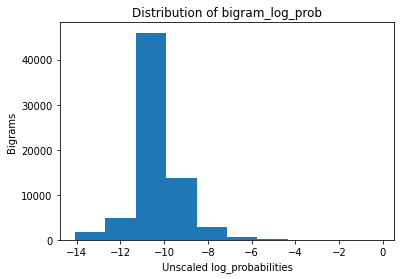

In [ ]:
import matplotlib.pyplot as plt
plt.hist(bigram_log_prob.values())
plt.title("Distribution of bigram_log_prob")
plt.xlabel("Unscaled log_probabilities")
plt.ylabel("Bigrams");

In [ ]:
#scaling of the bigram log_probabilities
factor = -1/sum(bigram_log_prob.values())
for bigram in bigram_log_prob:
  bigram_log_prob[bigram] = bigram_log_prob[bigram]*factor

In [ ]:
min(bigram_log_prob.values())

-1.943468862757628e-05

In [ ]:
sum(bigram_log_prob.values())


-0.9999999999998546

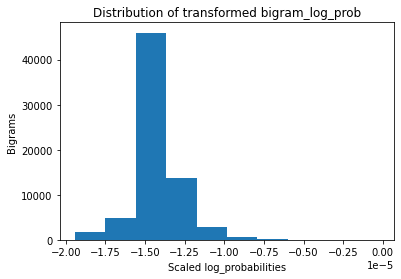

In [ ]:
import matplotlib.pyplot as plt
plt.hist(bigram_log_prob.values())
plt.title("Distribution of transformed bigram_log_prob")
plt.xlabel("Scaled log_probabilities")
plt.ylabel("Bigrams");

In [ ]:
#creation of the non_ex_bigr_log_prob, where the laplace smoothing occurs for bigrams that are not inside bigr_log_prob.
non_ex_bigr_log_prob = {}
for key in list(unigram_counter.keys()):
  non_ex_bigr_log_prob[key]=math.log2(1/(unigram_counter[(key,)] + vocab_size))
non_ex_bigr_log_prob[("<s>",)] = 0

In [ ]:
#scaling for the non_ex_bigr_log_prob
factor_uni = -1/sum(non_ex_bigr_log_prob.values())
for bigram in non_ex_bigr_log_prob:
  non_ex_bigr_log_prob[bigram] = non_ex_bigr_log_prob[bigram]*factor_uni

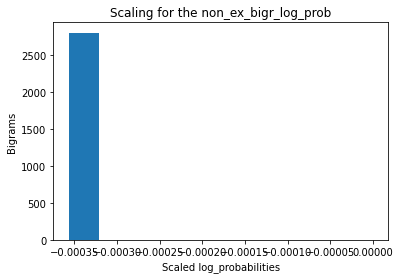

In [ ]:
import matplotlib.pyplot as plt
plt.hist(non_ex_bigr_log_prob.values())
plt.title("Scaling for the non_ex_bigr_log_prob")
plt.xlabel("Scaled log_probabilities")
plt.ylabel("Bigrams");

In [ ]:
# Step 3
l1=np.array([1])                        # possible values for the λ1, λ2 fine-tuning
l2=np.array([0.1,0.2,0.3,0.4,0.5,1,2,2.5,3.33,5,10])
comb = list(product(l1,l2))             # combinations of λ1, λ2

for l_1,l_2 in comb:
  value_mem = 0                         # initializing a value that will later be added to the total log-sum
  N_word_path = np.empty([1,0])
  N_word_path = np.append(N_word_path,{(" ","<s>") : 1})       # needed because previous_word chooses the previous second bigram word in every iteration

  for i in range(1,len(sentence_list)-1):                      # exclude dictionary containing <e>
    L_final = {}
    sumsum = 0
    for vocab_word in vocab_used:
      sumsum += math.log2(sentence_list[i][vocab_word])
    for vocab_word in vocab_used:
      log_prob_lev = math.log2(sentence_list[i][vocab_word])/(-sumsum)   # log of the Lev probs of the candidate words (all words of the vocabulary are actually candidates)
      for previous_word in N_word_path[i-1].keys():                      # in order to take the "<s>", we begin with [i-1] with i:1-len(dictionary)
        previous_word = previous_word[1]                                 # I take the second word from the previous bigram-tuple

        # calculating bigram log probs
        if (previous_word,vocab_word) in bigram_prob.keys():
          log_prob_bigr = previous_word, vocab_word, bigram_log_prob[(previous_word,vocab_word)]                                                                # check if the bigram of the previous word exists
        else:
            log_prob_bigr = previous_word, vocab_word, non_ex_bigr_log_prob[(previous_word,)]       # Laplace smoothing
        if i!=1:                                                                                                           # in the 1st iteration, there's only [{(' ', '<s>'): 1}], not 3 elements
          for k in range(3):                                   # we chose to keep the 3 best candidate words per iteration
            if list(N_word_path[i-1].keys())[k][1] == previous_word:
              value_mem = list(N_word_path[i-1].values())[k]
        L_final[(previous_word,vocab_word)] = -l_1*log_prob_bigr[2] - l_2*log_prob_lev + value_mem

    best_3_words = dict(sorted(L_final.items(), key=lambda item: item[1],reverse=False)[:3])                               # keep the 3 bigrams with the minimum sum(log(probs))
    N_word_path = np.append(N_word_path,best_3_words)          # in order to remember the path


  # Including the bigram with <e>
  log_prob_lev = 0
  L_final = {}
  for previous_word in N_word_path[i].keys():                  # For all the BEST bigrams I have kept... // In the first iteration i=1, so in order to take the "<s>", begin with i-1=0
    previous_word = previous_word[1]
    if (previous_word,'<e>') in bigram_prob.keys():
        log_prob_bigr = previous_word, '<e>', bigram_log_prob[(previous_word,'<e>')]                                    # bigram's log(prob)
    else:
        log_prob_bigr = previous_word, '<e>', non_ex_bigr_log_prob[(previous_word,)]             # Laplace smoothing if the combination is not in the bigram_prob
    for k in range(3):
      if list(N_word_path[i].keys())[k][1] == previous_word:
        value_mem = list(N_word_path[i].values())[k]

    L_final[(previous_word,'<e>')] = -l_1*log_prob_bigr[2] - l_2*log_prob_lev + value_mem
  best_3_words = dict(sorted(L_final.items(), key=lambda item: item[1],reverse=False)[:3])
  N_word_path = np.append(N_word_path,best_3_words)


  # finding the best route to make a final prediction
  best_route = dict(sorted(L_final.items(), key=lambda item: item[1],reverse=False)[:1])        # from the 3 possible last tuple-bigrams, we choose the one with the minimum value
  a = list(best_route.keys())[0][0]                                                             # best route 2nd bigram word --> (a, '<e>')
  prediction = [a]

  for i in range(len(N_word_path)-2,1,-1):                                                      # find the route reversed (starting from the end)
    a_list = []
    for j in range(3):                                                                          # len(N_word_path[i]) // we have chosen 3 arbitrarily
      if a == list(N_word_path[i].keys())[j][1]:
        a_list.append(list(N_word_path[i].values())[j])

    min_value = min(a_list)
    for tuple_key, sum_log_value in N_word_path[i].items():
      if sum_log_value == min_value and tuple_key[1] == a:                                      # two tuple-bigrams might have the same 2nd word
          a = tuple_key[0]
          prediction.append(a)                                                                  # save prediction from end to start

  prediction.reverse()                                                                          # thus reverse the prediction

  good=' '.join([str(elem) for elem in prediction if elem not in [",", "."]])                   # eliminating whitespaces before , and . in our prediction
  kati = ''.join([str(elem) for elem in prediction if elem in [",", "."]])
  good = good + kati
  print("λ1:", l_1, "and λ2:", l_2, "-->", good)

λ1: 1 and λ2: 0.1 --> They claim the NLIS is not just the fact Mr McGauran said,.
λ1: 1 and λ2: 0.2 --> They claim the NLIS is not just the fact Mr McGauran said,.
λ1: 1 and λ2: 0.3 --> They claim the NLIS is not just the fact Mr McGauran said,.
λ1: 1 and λ2: 0.4 --> They claim the NLIS is not just the fact Mr McGauran said,.
λ1: 1 and λ2: 0.5 --> They claim the NLIS is not just the fact Mr McGauran said,.
λ1: 1 and λ2: 1.0 --> They claim the NLIS is not just the fact Mr McGauran said,.
λ1: 1 and λ2: 2.0 --> They claim the NLIS is not just the fact Mr McGauran said,.
λ1: 1 and λ2: 2.5 --> They claim the NLIS is not just the fact Mr McGauran said,.
λ1: 1 and λ2: 3.33 --> They claim the NLIS as it just the fact " Mr McGauran said.
λ1: 1 and λ2: 5.0 --> They claim the NLIS as it just the fact " Mr McGauran said.
λ1: 1 and λ2: 10.0 --> They claim the NLIS is not just the fact " Mr McGauran said.


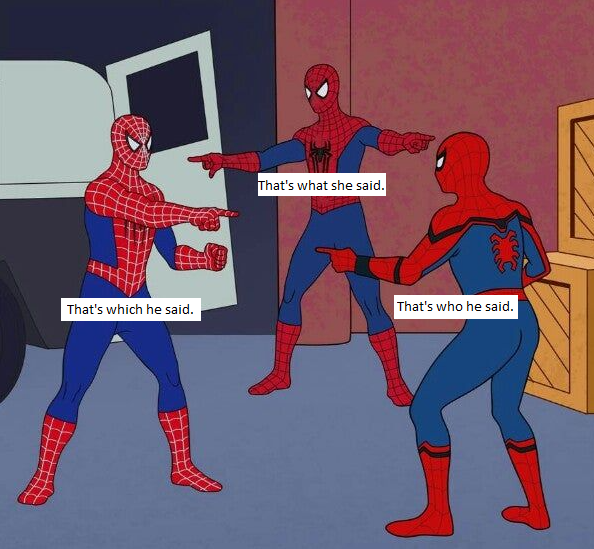